## Now can we train the RNN model?

In [1]:
import numpy as np
import pandas as pd
import sys
import tensorflow as tf
import keras
from keras.models import Sequential
from keras.layers import Dense, Activation, GRU
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

## Requirements : <br/>Version of TensorFlow : 2.3.1<br/>Version of Keras : 2.4.3

In [2]:
print("Version of TensorFlow :", tf.__version__)
print("Version of Keras :", keras.__version__)

Version of TensorFlow : 2.3.1
Version of Keras : 2.4.3


## Import data & Regularize?

In [5]:
tier = 'PLATINUM'
data = pd.read_pickle("./RNN Dataset/{0}/Train/Data/{0}{1}.pkl".format(tier, 1))
target = pd.read_pickle("./RNN Dataset/{0}/Train/Target/{0}{1}.pkl".format(tier, 1))
start, end = 2, 50

## Build RNN model(GRU)

In [8]:
start, end = 2, 50
mod = sys.modules[__name__]
numFeatures = data[0].shape[1] # 25
############### Build 3-layer RNN model ###############
for tl in range(start, end+1): # timeline from 1 minute to 50 minute.
    setattr(mod, "RNN{}".format(tl), Sequential([
    GRU(numFeatures, return_sequences=True, input_shape=(tl, numFeatures)), Activation('relu'),
    #GRU(numFeatures, return_sequences=True), Activation('relu'),
    #GRU(numFeatures, return_sequences=False), Activation('relu'),
    Dense(2, activation='softmax')
    ]))
    eval("RNN{}".format(tl)).compile(loss='mean_squared_error', optimizer='sgd')
    setattr(mod, "target_{}".format(tl), target.copy())
    setattr(mod, "delete_{}".format(tl), [])
    print(" >> Processing : RNN{}".format(tl))
    print(eval("RNN{}".format(tl)).summary())
#######################################################

 >> Processing : RNN2
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
gru (GRU)                    (None, 2, 22)             3036      
_________________________________________________________________
activation (Activation)      (None, 2, 22)             0         
_________________________________________________________________
dense (Dense)                (None, 2, 2)              46        
Total params: 3,082
Trainable params: 3,082
Non-trainable params: 0
_________________________________________________________________
None
 >> Processing : RNN3
Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
gru_1 (GRU)                  (None, 3, 22)             3036      
_________________________________________________________________
activation_1 (Activation)    (None, 3, 22)       

 >> Processing : RNN13
Model: "sequential_11"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
gru_11 (GRU)                 (None, 13, 22)            3036      
_________________________________________________________________
activation_11 (Activation)   (None, 13, 22)            0         
_________________________________________________________________
dense_11 (Dense)             (None, 13, 2)             46        
Total params: 3,082
Trainable params: 3,082
Non-trainable params: 0
_________________________________________________________________
None
 >> Processing : RNN14
Model: "sequential_12"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
gru_12 (GRU)                 (None, 14, 22)            3036      
_________________________________________________________________
activation_12 (Activation)   (None, 14, 22)

 >> Processing : RNN25
Model: "sequential_23"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
gru_23 (GRU)                 (None, 25, 22)            3036      
_________________________________________________________________
activation_23 (Activation)   (None, 25, 22)            0         
_________________________________________________________________
dense_23 (Dense)             (None, 25, 2)             46        
Total params: 3,082
Trainable params: 3,082
Non-trainable params: 0
_________________________________________________________________
None
 >> Processing : RNN26
Model: "sequential_24"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
gru_24 (GRU)                 (None, 26, 22)            3036      
_________________________________________________________________
activation_24 (Activation)   (None, 26, 22)

 >> Processing : RNN36
Model: "sequential_34"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
gru_34 (GRU)                 (None, 36, 22)            3036      
_________________________________________________________________
activation_34 (Activation)   (None, 36, 22)            0         
_________________________________________________________________
dense_34 (Dense)             (None, 36, 2)             46        
Total params: 3,082
Trainable params: 3,082
Non-trainable params: 0
_________________________________________________________________
None
 >> Processing : RNN37
Model: "sequential_35"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
gru_35 (GRU)                 (None, 37, 22)            3036      
_________________________________________________________________
activation_35 (Activation)   (None, 37, 22)

 >> Processing : RNN47
Model: "sequential_45"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
gru_45 (GRU)                 (None, 47, 22)            3036      
_________________________________________________________________
activation_45 (Activation)   (None, 47, 22)            0         
_________________________________________________________________
dense_45 (Dense)             (None, 47, 2)             46        
Total params: 3,082
Trainable params: 3,082
Non-trainable params: 0
_________________________________________________________________
None
 >> Processing : RNN48
Model: "sequential_46"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
gru_46 (GRU)                 (None, 48, 22)            3036      
_________________________________________________________________
activation_46 (Activation)   (None, 48, 22)

## Training

In [ ]:
scaler = StandardScaler()
for numData in range(1, 6):
    data = pd.read_pickle("./RNN Dataset/{0}/Train/Data/{0}{1}.pkl".format(tier, numData))
    targetVector = pd.read_pickle("./RNN Dataset/{0}/Train/Target/{0}{1}.pkl".format(tier, numData))
    # 승률 계산을 위한 타겟벡터 가공
    softmaxTargetVector = []
    for blueWin in targetVector:
        if blueWin == 1:
            softmaxTargetVector.append([1, 0])
        else:
            softmaxTargetVector.append([0, 1])
    softmaxTargetVector = np.array(softmaxTargetVector)
    print("\n=======================================")
    print("{}{} loaded".format(tier, numData))
    for tl in range(start, end+1):
        print("---------------------------------------")
        print(" >> Processing : RNN{} training start".format(tl))
        for idx in range(data.shape[0]):
            match = data[idx]
            endTime = match.shape[0]
            if tl <= endTime:
                #print(" >> >> {}th match endTime = {}".format(idx, endTime))
                input_data = match[:tl, :]
                input_data = scaler.fit_transform(input_data)
                timestamps, input_dim = input_data.shape
                input_data = input_data.reshape(1, timestamps, input_dim)
                # Make target shape (-1, 2) for train(RNN 모델을 위해.. 이유는 잘 모르겠음)
                target = softmaxTargetVector[idx].reshape(-1, 2)
                print("input_data.shape : {} / target.shape: {}".format(input_data.shape, target.shape))
                eval("RNN{}".format(tl)).fit(input_data, target, epochs=1, verbose=0)
        print("---------------------------------------")
    print("=======================================\n")


PLATINUM1 loaded
---------------------------------------
 >> Processing : RNN2 training start
input_data.shape : (1, 2, 22) / target.shape: (1, 2)
input_data.shape : (1, 2, 22) / target.shape: (1, 2)
input_data.shape : (1, 2, 22) / target.shape: (1, 2)
input_data.shape : (1, 2, 22) / target.shape: (1, 2)
input_data.shape : (1, 2, 22) / target.shape: (1, 2)
input_data.shape : (1, 2, 22) / target.shape: (1, 2)
input_data.shape : (1, 2, 22) / target.shape: (1, 2)
input_data.shape : (1, 2, 22) / target.shape: (1, 2)
input_data.shape : (1, 2, 22) / target.shape: (1, 2)
input_data.shape : (1, 2, 22) / target.shape: (1, 2)
input_data.shape : (1, 2, 22) / target.shape: (1, 2)
input_data.shape : (1, 2, 22) / target.shape: (1, 2)
input_data.shape : (1, 2, 22) / target.shape: (1, 2)
input_data.shape : (1, 2, 22) / target.shape: (1, 2)
input_data.shape : (1, 2, 22) / target.shape: (1, 2)
input_data.shape : (1, 2, 22) / target.shape: (1, 2)
input_data.shape : (1, 2, 22) / target.shape: (1, 2)
inpu

input_data.shape : (1, 2, 22) / target.shape: (1, 2)
input_data.shape : (1, 2, 22) / target.shape: (1, 2)
input_data.shape : (1, 2, 22) / target.shape: (1, 2)
input_data.shape : (1, 2, 22) / target.shape: (1, 2)
input_data.shape : (1, 2, 22) / target.shape: (1, 2)
input_data.shape : (1, 2, 22) / target.shape: (1, 2)
input_data.shape : (1, 2, 22) / target.shape: (1, 2)
input_data.shape : (1, 2, 22) / target.shape: (1, 2)
input_data.shape : (1, 2, 22) / target.shape: (1, 2)
input_data.shape : (1, 2, 22) / target.shape: (1, 2)
input_data.shape : (1, 2, 22) / target.shape: (1, 2)
input_data.shape : (1, 2, 22) / target.shape: (1, 2)
input_data.shape : (1, 2, 22) / target.shape: (1, 2)
input_data.shape : (1, 2, 22) / target.shape: (1, 2)
input_data.shape : (1, 2, 22) / target.shape: (1, 2)
input_data.shape : (1, 2, 22) / target.shape: (1, 2)
input_data.shape : (1, 2, 22) / target.shape: (1, 2)
input_data.shape : (1, 2, 22) / target.shape: (1, 2)
input_data.shape : (1, 2, 22) / target.shape: 

# Intermediate save

In [7]:
data = 0
targetVector = 0
for tl in range(start, end+1):
    #with open("./RNN Classifiers/{}{}".format(tier, tl), "wb") as f:
    eval("RNN{}".format(tl)).save("RNN Classifiers/{0}/{0}{1}".format(tier, tl))

Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
INFO:tensorflow:Assets written to: RNN Classifiers/PLATINUM/PLATINUM2\assets
INFO:tensorflow:Assets written to: RNN Classifiers/PLATINUM/PLATINUM3\assets
INFO:tensorflow:Assets written to: RNN Classifiers/PLATINUM/PLATINUM4\assets
INFO:tensorflow:Assets written to: RNN Classifiers/PLATINUM/PLATINUM5\assets
INFO:tensorflow:Assets written to: RNN Classifiers/PLATINUM/PLATINUM6\assets
INFO:tensorflow:Assets written to: RNN Classifiers/PLATINUM/PLATINUM7\assets
INFO:tensorflow:Assets written to: RNN Classifiers/PLATINUM/PLATINUM8\assets
INFO:tensorflow:Assets written to: RNN Classifiers/PLATINUM/PLATINUM9\assets
INFO:tensorflow:Assets written to: RNN Classifiers/PLATINUM/PLATINUM10\assets
INFO:tensorflow:Assets written to: RNN Classifiers/PLATINUM/PLATINUM11\a

## Test

In [8]:
data = pd.read_pickle("./RNN Dataset/{0}/Test/Data/{0}{1}.pkl".format(tier, 1))
target = pd.read_pickle("./RNN Dataset/{0}/Test/Target/{0}{1}.pkl".format(tier, 1))
data = data[:5000]
target = target[:5000]
numMatches = data.shape[0]
print("{} matches loaded".format(numMatches))

5000 matches loaded


In [9]:
#start, end = 2, 50
for tl in range(start, end+1):
    print(" >> Processing : RNN{} test start".format(tl))
    setattr(mod, "target{}".format(tl), [])
    setattr(mod, "pred{}".format(tl), [])
    for idx in range(numMatches):
        match = data[idx]
        endTime = match.shape[0]
        if tl <= endTime:
            #print(" >> >> {}th match endTime = {}".format(idx, endTime))
            input_data = match[:tl, :]
            input_data = scaler.fit_transform(input_data)
            timestamps, input_dim = input_data.shape
            input_data = input_data.reshape(1, timestamps, input_dim)
            pred = eval("RNN{}".format(tl)).predict(input_data)
            bwRate, rwRate = pred[0]
            if bwRate > 0.5: pred = 1 # predict blue win
            else: pred = 0 # predict red win
            eval("pred{}".format(tl)).append(pred)
            eval("target{}".format(tl)).append(target[idx])
acc_lst = []
for tl in range(start, end+1):
    y_pred = eval("pred{}".format(tl))
    y_test = eval("target{}".format(tl))
    acc = accuracy_score(y_test, y_pred)
    acc_lst.append(acc)

 >> Processing : RNN2 test start
 >> Processing : RNN3 test start
 >> Processing : RNN4 test start
 >> Processing : RNN5 test start
 >> Processing : RNN6 test start
 >> Processing : RNN7 test start
 >> Processing : RNN8 test start
 >> Processing : RNN9 test start
 >> Processing : RNN10 test start
 >> Processing : RNN11 test start
 >> Processing : RNN12 test start
 >> Processing : RNN13 test start
 >> Processing : RNN14 test start
 >> Processing : RNN15 test start
 >> Processing : RNN16 test start
 >> Processing : RNN17 test start
 >> Processing : RNN18 test start
 >> Processing : RNN19 test start
 >> Processing : RNN20 test start
 >> Processing : RNN21 test start
 >> Processing : RNN22 test start
 >> Processing : RNN23 test start
 >> Processing : RNN24 test start
 >> Processing : RNN25 test start
 >> Processing : RNN26 test start
 >> Processing : RNN27 test start
 >> Processing : RNN28 test start
 >> Processing : RNN29 test start
 >> Processing : RNN30 test start
 >> Processing : RNN31

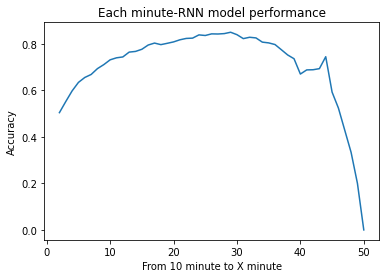

In [10]:
import matplotlib.pyplot as plt

x_axis = list(range(start, end+1))
fig = plt.figure()
fig.patch.set_facecolor("white")
plt.plot(x_axis, acc_lst)
plt.xlabel("From 10 minute to X minute")
plt.ylabel("Accuracy")
plt.title("Each minute-RNN model performance")
plt.show()

In [11]:
data = pd.read_pickle("./RNN Dataset/{0}/Test/Data/{0}{1}.pkl".format(tier, 1))
target = pd.read_pickle("./RNN Dataset/{0}/Test/Target/{0}{1}.pkl".format(tier, 1))

In [12]:
for i in range(data.shape[0]):
    endTime = data[i].shape[0]
    if endTime == 30: # 경기 시간이 30분인 매치 탐색
        index = i
        sample = data[i]
        break
print(target[index])

0


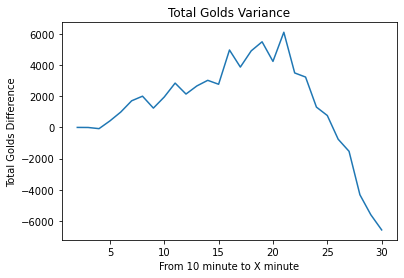

In [13]:
totalGolds = []
for tl in range(start, endTime+1):
    totalGolds.append(sample[tl-1][0])
x_axis = list(range(start, endTime+1))
fig = plt.figure()
fig.patch.set_facecolor("white")
plt.plot(x_axis, totalGolds)
plt.xlabel("From 10 minute to X minute")
plt.ylabel("Total Golds Difference")
plt.title("Total Golds Variance")
plt.show()

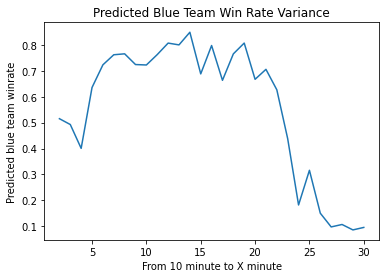

In [14]:
y_pred = []
for tl in range(start, endTime+1):
    input_data = sample[:tl, :]
    input_data = scaler.fit_transform(input_data)
    timestamps, input_dim = input_data.shape
    input_data = input_data.reshape(1, timestamps, input_dim)
    pred = eval("RNN{}".format(tl)).predict(input_data)
    y_pred.append(pred[0][0])
x_axis = list(range(start, endTime+1))
fig = plt.figure()
fig.patch.set_facecolor("white")
plt.plot(x_axis, y_pred)
plt.xlabel("From 10 minute to X minute")
plt.ylabel("Predicted blue team winrate")
plt.title("Predicted Blue Team Win Rate Variance")
plt.show()

In [27]:
columns = [i for i in range(1, 31)]
firstPred = [0.5]
y_pred_df = pd.DataFrame([firstPred+y_pred], columns=columns)
y_pred_df

,1,2,3,4,5,6,7,8,9,10,...,21,22,23,24,25,26,27,28,29,30
0,0.5,0.515226,0.492749,0.400784,0.635546,0.723056,0.761911,0.765568,0.724171,0.722477,...,0.705658,0.62674,0.438066,0.182373,0.316126,0.150558,0.097638,0.107036,0.086093,0.095722


In [23]:
diff_columns = [
        "total_gold", # 0 numeric
        "current_gold", # 1 numeric
        "total_level", # 2 numeric
        "avg_level", # 3 numeric
        "kills_total_minion", # 4 numeric
        "kills_total_jungle_minion", # 5 numeric
        "first_blood", # 6 binary
        "kills", # 7
        "deaths", # 8
        "assists", # 9
        "place_wards", # 10
        "kills_wards", # 11
        "first_tower", # 12 binary
        "first_inhibitor", # 13 binary
        # "first_tower_lane", # 14 category, delete
        "kills_total_towers", # 15
        "kills_mid_towers", # 16
        "kills_top_towers", # 17
        "kills_bot_towers", # 18
        "kills_inhibitors", # 19
        "first_dragon", # 20
        # "dragon_type", # 21, delete 해서 총 22개 남는다.
        "total_dragons", # 22
        "rift_heralds", # 23
    ]
df = pd.DataFrame([sample[24]-sample[23]], columns=diff_columns)
df

,total_gold,current_gold,total_level,avg_level,kills_total_minion,kills_total_jungle_minion,first_blood,kills,deaths,assists,...,first_tower,first_inhibitor,kills_total_towers,kills_mid_towers,kills_top_towers,kills_bot_towers,kills_inhibitors,first_dragon,total_dragons,rift_heralds
0,-539.0,2171.0,0.0,-1.831868e-15,0.0,-8.0,0.0,-1.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.0,0.0


In [29]:
df = pd.DataFrame([sample[25]-sample[24]], columns=diff_columns)
df

,total_gold,current_gold,total_level,avg_level,kills_total_minion,kills_total_jungle_minion,first_blood,kills,deaths,assists,...,first_tower,first_inhibitor,kills_total_towers,kills_mid_towers,kills_top_towers,kills_bot_towers,kills_inhibitors,first_dragon,total_dragons,rift_heralds
0,-1522.0,-2061.0,-4.0,-0.8,-8.0,-4.0,0.0,-4.0,4.0,-7.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [31]:
df = pd.DataFrame([sample[24]-sample[23]], columns=diff_columns)
df

,total_gold,current_gold,total_level,avg_level,kills_total_minion,kills_total_jungle_minion,first_blood,kills,deaths,assists,...,first_tower,first_inhibitor,kills_total_towers,kills_mid_towers,kills_top_towers,kills_bot_towers,kills_inhibitors,first_dragon,total_dragons,rift_heralds
0,-539.0,2171.0,0.0,-1.831868e-15,0.0,-8.0,0.0,-1.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.0,0.0


In [32]:
type(y_pred[2])

numpy.float32

In [33]:
float(y_pred[2])

0.4007844924926758

In [34]:
y_pred_converted = float(y_pred[2])
type(y_pred_converted)

float

In [36]:
y_pred_rounded = round(y_pred_converted, 3)
y_pred_rounded

0.401